##### Criação gráfica para análise do dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/heart.csv")

In [3]:
df_transformado = pd.read_csv("../data/dados_transformados.csv")

In [4]:
df['FastingBS'] = df['FastingBS'].replace({1: 'Y', 0: 'N'})
df['HeartDisease'] = df['HeartDisease'].replace({1: 'S', 0: 'N'})

##### Gráfico de correlações

In [5]:
plt.style.use('default')

In [6]:
sns.set_style('darkgrid')

<Axes: >

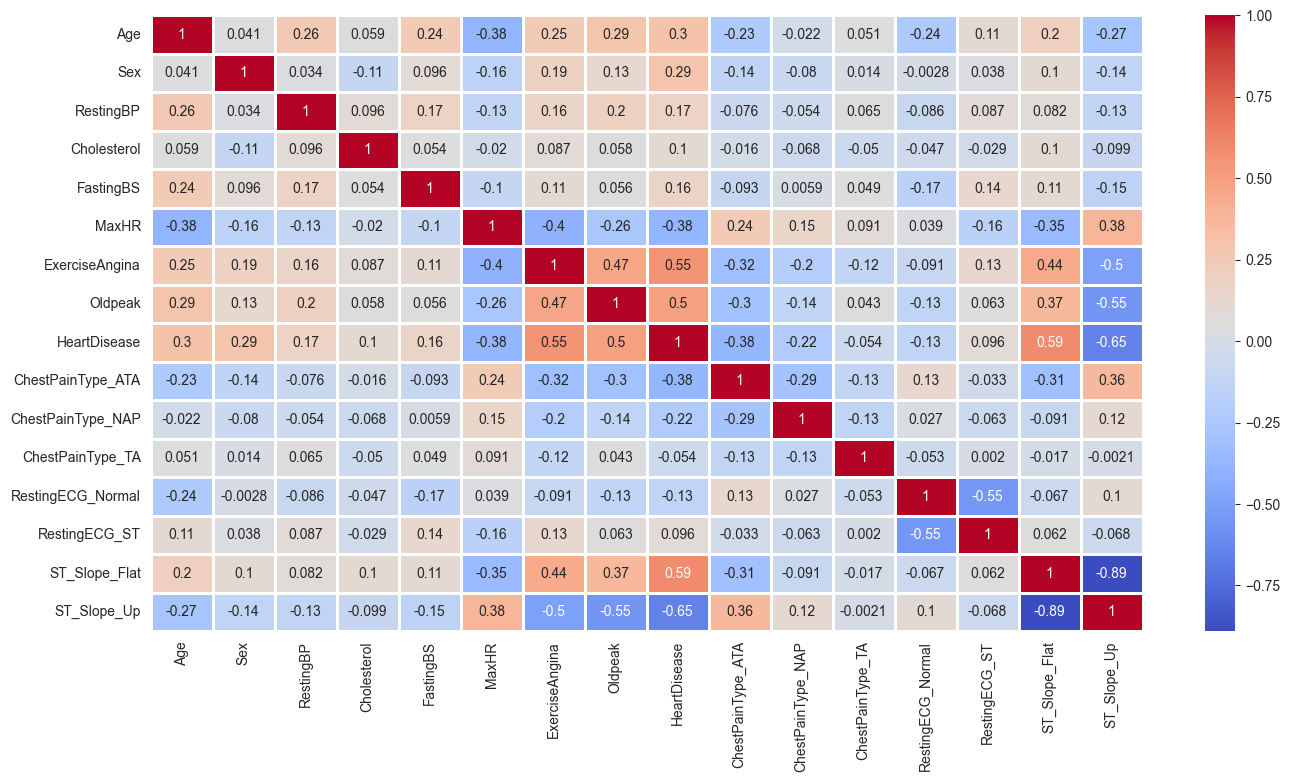

In [7]:
corr_matrix = df_transformado.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=1)

Observações Principais:

1. HeartDisease:
Oldpeak (0.5): Existe uma correlação positiva moderada entre 'Oldpeak' e 'HeartDisease', o que sugere que maiores valores de 'Oldpeak' estão associados a uma maior probabilidade de doença cardíaca.
ExerciseAngina (0.44): Também há uma correlação positiva considerável com 'ExerciseAngina', indicando que a angina induzida pelo exercício está relacionada à presença de doença cardíaca.
ST_Slope_Flat (0.59): Uma correlação positiva moderada, sugerindo que uma inclinação do segmento ST plana está associada a doenças cardíacas.
ST_Slope_Up (-0.65): Correlação negativa forte, indicando que uma inclinação ascendente do segmento ST está associada a uma menor chance de doença cardíaca.

2. MaxHR (-0.38):
'MaxHR' (frequência cardíaca máxima) apresenta uma correlação negativa com a idade e com a doença cardíaca, o que sugere que à medida que a idade avança ou a presença de doença cardíaca aumenta, a frequência cardíaca máxima tende a ser menor.

3. Age:
Existe uma correlação moderada positiva entre a idade e a variável 'Oldpeak' (0.29), e uma correlação negativa moderada entre idade e 'MaxHR' (-0.38), o que é esperado já que a capacidade física tende a diminuir com a idade.

4. ST_Slope_Flat e ST_Slope_Up:
Essas variáveis estão altamente correlacionadas de maneira negativa (-0.89), indicando que elas são praticamente opostas, o que faz sentido considerando que se referem a diferentes características do eletrocardiograma.

5. ExerciseAngina:
Correlação positiva com 'Oldpeak' (0.47) e 'HeartDisease' (0.44), o que sugere que a presença de angina induzida por exercício está fortemente relacionada com maiores níveis de 'Oldpeak' e com a presença de doenças cardíacas.

##### Gráficos para análise univariada

In [8]:
df_transformado['HeartDisease'] = df_transformado['HeartDisease'].replace({1: 'S', 0: 'N'})

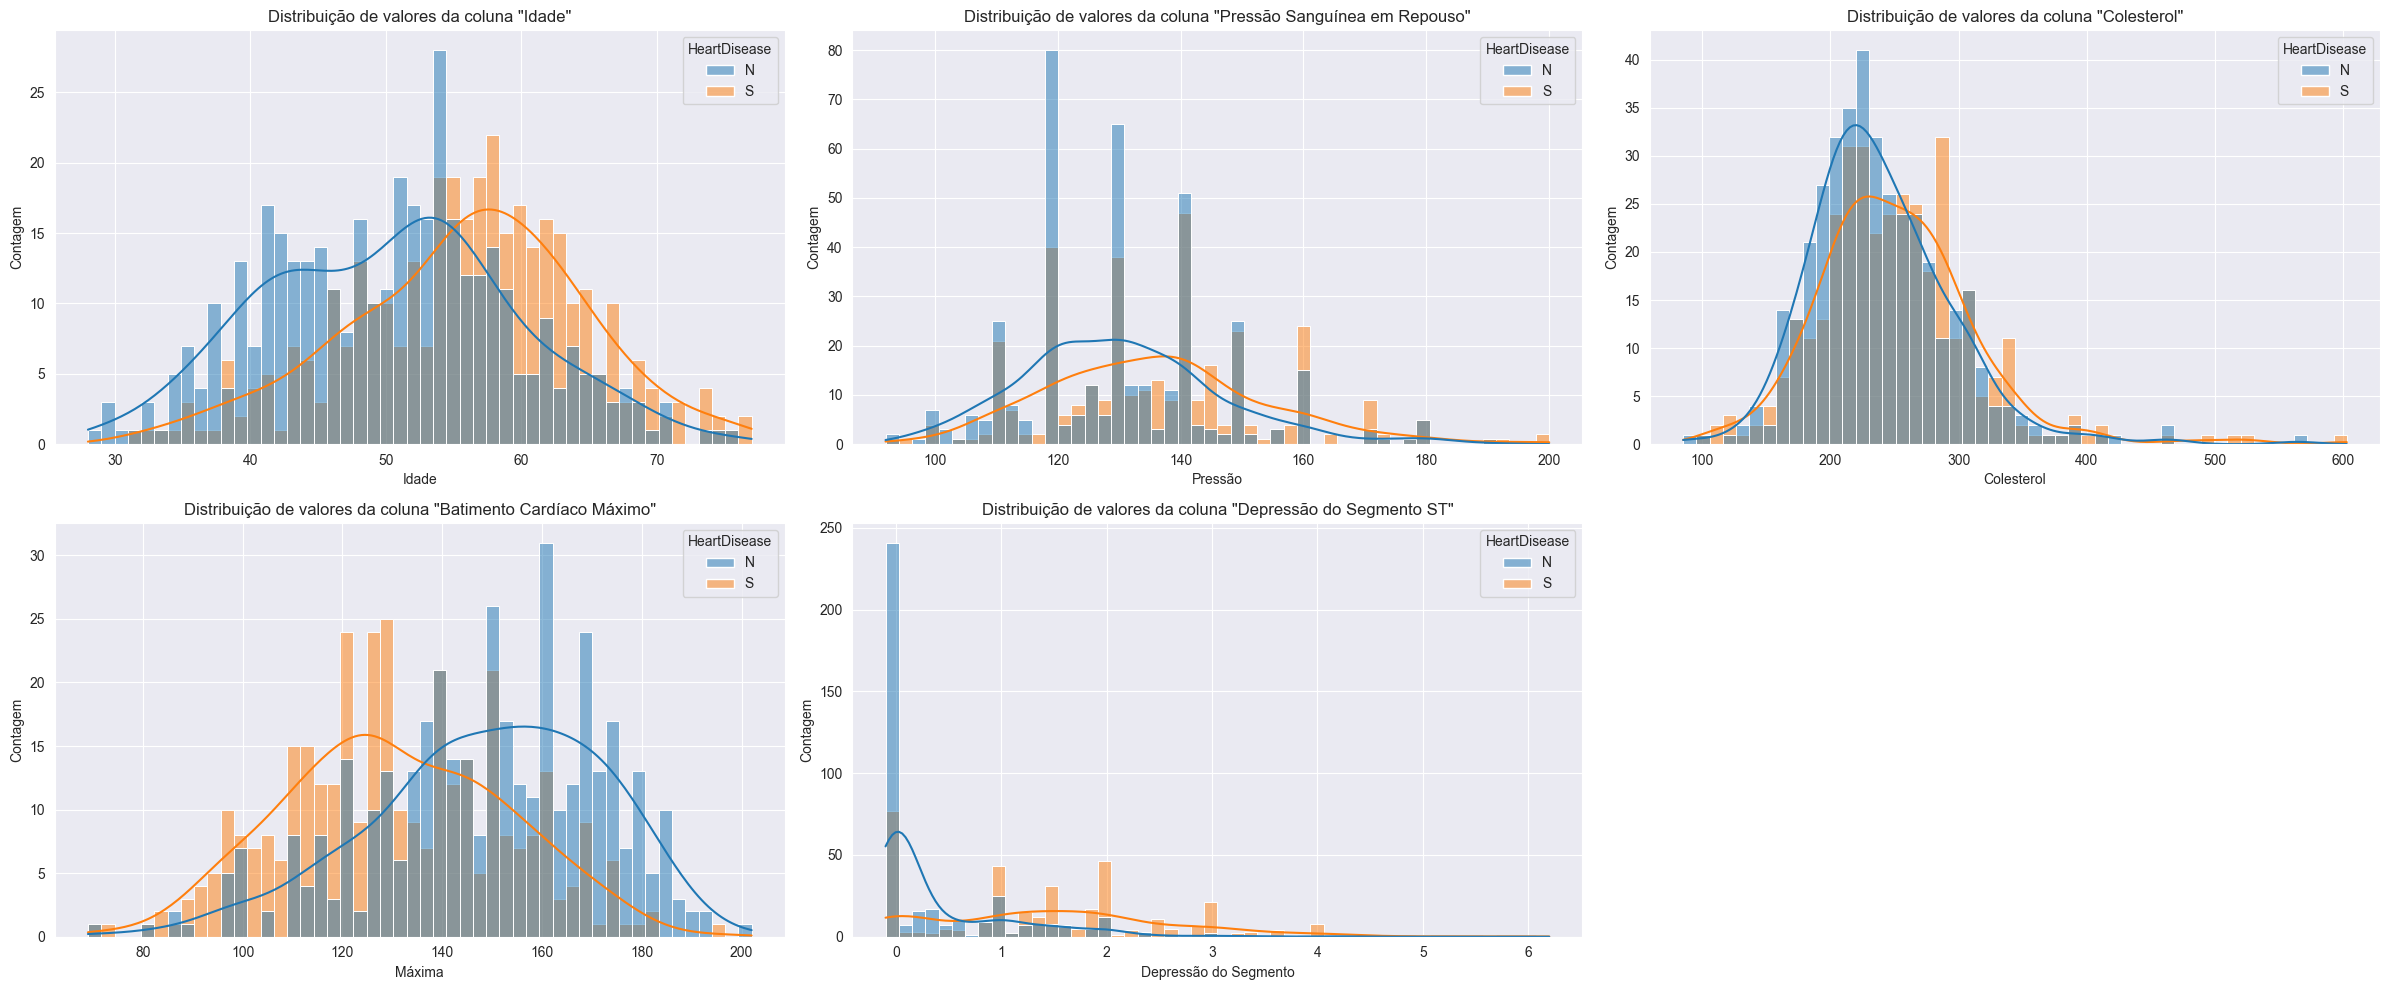

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
axes = axes.flatten() 

sns.histplot(data=df_transformado, x='Age', kde=True, bins=50, hue='HeartDisease', ax=axes[0])
axes[0].set_title('Distribuição de valores da coluna "Idade"')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Contagem')
axes[0].grid(True)

sns.histplot(data=df_transformado, x='RestingBP', kde=True, bins=50, hue='HeartDisease', ax=axes[1])
axes[1].set_title('Distribuição de valores da coluna "Pressão Sanguínea em Repouso"')
axes[1].set_xlabel('Pressão')
axes[1].set_ylabel('Contagem')
axes[1].grid(True)

sns.histplot(data=df_transformado, x='Cholesterol', kde=True, bins=50, hue='HeartDisease', ax=axes[2])
axes[2].set_title('Distribuição de valores da coluna "Colesterol"')
axes[2].set_xlabel('Colesterol')
axes[2].set_ylabel('Contagem')
axes[2].grid(True)

sns.histplot(data=df_transformado, x='MaxHR', kde=True, bins=50, hue='HeartDisease', ax=axes[3])
axes[3].set_title('Distribuição de valores da coluna "Batimento Cardíaco Máximo"')
axes[3].set_xlabel('Máxima')
axes[3].set_ylabel('Contagem')
axes[3].grid(True)

sns.histplot(data=df_transformado, x='Oldpeak', kde=True, bins=50, hue='HeartDisease', ax=axes[4])
axes[4].set_title('Distribuição de valores da coluna "Depressão do Segmento ST"')
axes[4].set_xlabel('Depressão do Segmento')
axes[4].set_ylabel('Contagem')
axes[4].grid(True)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

1. Distribuição de Idade:

- A distribuição etária de pacientes sem doença cardíaca (N) e com doença cardíaca (S) é visivelmente distinta.
- Pacientes sem doença cardíaca tendem a ter uma idade ligeiramente menor, com um pico em torno dos 50 anos.
- Já para aqueles com doença cardíaca, a distribuição também apresenta um pico ao redor dos 50 anos, mas a presença de doença é mais prevalente em idades um pouco mais avançadas.

2. Distribuição da Pressão Sanguínea em Repouso:

- A distribuição para 'Pressão Sanguínea em Repouso' é bem dispersa, com a maioria dos pacientes apresentando valores entre 110 e 140 mmHg.
- Pacientes com doença cardíaca (S) têm uma distribuição que é mais uniforme em comparação aos sem doença (N), que possuem um pico mais acentuado na faixa de 120 a 140 mmHg.

3. Distribuição de Colesterol:

- A distribuição de colesterol é assimétrica, com um pico acentuado entre 200 e 300 mg/dL.
- Pacientes sem doença cardíaca (N) tendem a ter níveis de colesterol concentrados nesse intervalo, enquanto os pacientes com doença cardíaca (S) apresentam uma distribuição mais dispersa, com alguns apresentando níveis de colesterol significativamente elevados acima de 300 mg/dL.

4. Distribuição de Batimento Cardíaco Máximo:

- A variável 'Batimento Cardíaco Máximo' apresenta uma distribuição que varia de 80 a 200 batimentos por minuto.
- Pacientes com doença cardíaca (S) têm um pico mais baixo, em torno de 120 batimentos por minuto, enquanto pacientes sem a doença (N) tendem a ter batimentos cardíacos máximos mais elevados, com picos entre 140 e 160 batimentos por minuto.

5. Distribuição da Depressão do Segmento ST:

- A maioria dos pacientes possui valores baixos de 'Depressão do Segmento ST', com um pico acentuado em torno de 0.
- Pacientes com doença cardíaca (S) tendem a apresentar valores mais altos de depressão do segmento ST, sugerindo uma relação direta entre o aumento desta métrica e a presença de doença cardíaca.

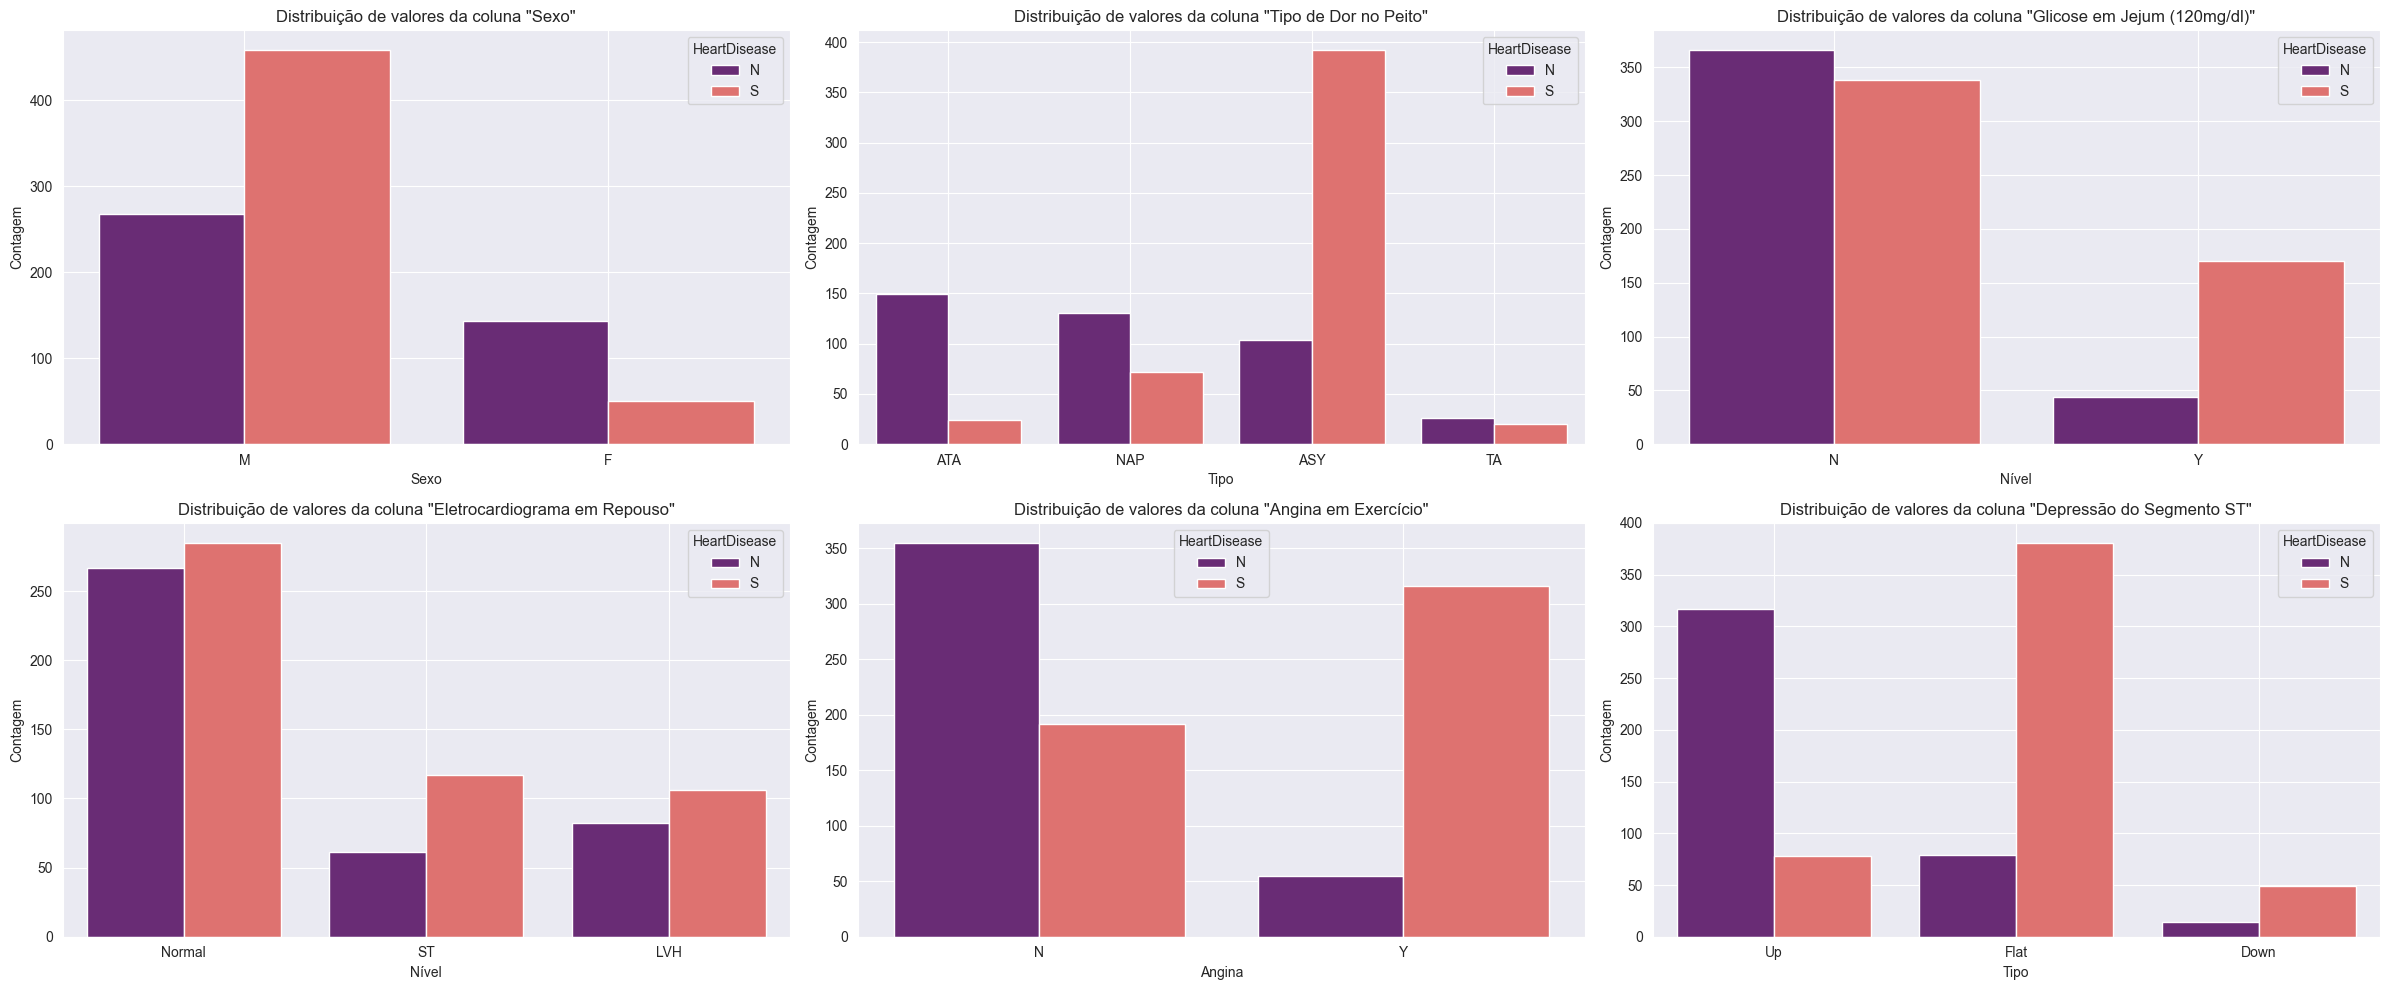

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
axes = axes.flatten() 

sns.countplot(data=df, x='Sex', hue='HeartDisease', ax=axes[0], palette='magma')
axes[0].set_title('Distribuição de valores da coluna "Sexo"')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Contagem')
axes[0].grid(True)

sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', ax=axes[1], palette='magma')
axes[1].set_title('Distribuição de valores da coluna "Tipo de Dor no Peito"')
axes[1].set_xlabel('Tipo')
axes[1].set_ylabel('Contagem')
axes[1].grid(True)

sns.countplot(data=df, x='FastingBS', hue='HeartDisease', ax=axes[2], palette='magma')
axes[2].set_title('Distribuição de valores da coluna "Glicose em Jejum (120mg/dl)"')
axes[2].set_xlabel('Nível')
axes[2].set_ylabel('Contagem')
axes[2].grid(True)

sns.countplot(data=df, x='RestingECG', hue='HeartDisease', ax=axes[3], palette='magma')
axes[3].set_title('Distribuição de valores da coluna "Eletrocardiograma em Repouso"')
axes[3].set_xlabel('Nível')
axes[3].set_ylabel('Contagem')
axes[3].grid(True)

sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease', ax=axes[4], palette='magma')
axes[4].set_title('Distribuição de valores da coluna "Angina em Exercício"')
axes[4].set_xlabel('Angina')
axes[4].set_ylabel('Contagem')
axes[4].grid(True)

sns.countplot(data=df, x='ST_Slope', hue='HeartDisease', ax=axes[5], palette='magma')
axes[5].set_title('Distribuição de valores da coluna "Depressão do Segmento ST"')
axes[5].set_xlabel('Tipo')
axes[5].set_ylabel('Contagem')
axes[5].grid(True)

plt.tight_layout()
plt.show()

1. Distribuição de Sexo:

- A maioria dos indivíduos com doença cardíaca (S) são do sexo masculino (M), enquanto o número de indivíduos sem doença cardíaca é mais equilibrado entre homens e mulheres.

2. Distribuição do Tipo de Dor no Peito:

- A dor no peito do tipo 'ASY' (angina asintomática) é muito mais comum entre indivíduos com doença cardíaca (S).
- Outros tipos de dor no peito, como 'ATA' e 'NAP', são mais distribuídos entre indivíduos sem doença cardíaca (N).

3. Distribuição de Glicose em Jejum (≥ 120 mg/dL):

- Indivíduos com níveis elevados de glicose em jejum (Y) são significativamente mais propensos a ter doença cardíaca (S).
- A maioria dos indivíduos sem doença cardíaca (N) apresenta níveis normais de glicose em jejum.

4. Distribuição do Eletrocardiograma em Repouso:

- Indivíduos com resultados normais no eletrocardiograma são mais comuns entre aqueles com doença cardíaca (S).
- Já as anomalias, como 'ST' e 'LVH', estão mais distribuídas entre os indivíduos sem doença cardíaca.

5. Distribuição de Angina em Exercício:

- A angina induzida por exercício (Y) é fortemente associada a pacientes com doença cardíaca (S).
- A ausência de angina durante o exercício (N) é mais comum em pacientes sem a doença.

6. Distribuição da Depressão do Segmento ST:

- A depressão do segmento ST do tipo 'Flat' (achatado) é muito mais prevalente entre os pacientes com doença cardíaca (S).
- Pacientes sem doença cardíaca (N) apresentam uma distribuição mais diversificada entre os tipos 'Up' (elevado) e 'Down' (abaixado).

##### Gráficos para as relações de maior correlação

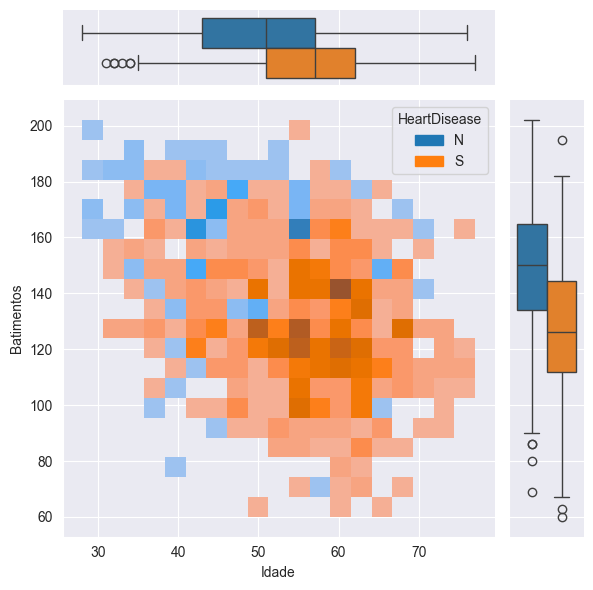

In [11]:
g = sns.JointGrid(data=df, x='Age', y='MaxHR', hue='HeartDisease')
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)
g.set_axis_labels(xlabel='Idade', ylabel='Batimentos')

1. Dispersão de Idade vs. Batimentos Cardíacos:

- Existe uma concentração maior de casos de doença cardíaca (S) entre pacientes na faixa etária de 50 a 65 anos, com batimentos variando principalmente entre 100 e 160 bpm.
- Pacientes sem doença cardíaca (N) mostram uma distribuição mais dispersa ao longo da faixa etária, com uma leve concentração em idades mais jovens e batimentos mais altos, especialmente acima de 140 bpm.

2. Boxplot de Idade:

- Pacientes com doença cardíaca (S) tendem a ser ligeiramente mais velhos, com uma mediana de idade superior à dos pacientes sem doença cardíaca (N).
- A variabilidade na idade também é maior entre os pacientes sem a doença.

3. Boxplot de Batimentos Cardíacos:

- A mediana dos batimentos cardíacos é similar entre os grupos com e sem doença cardíaca, mas há uma tendência de batimentos ligeiramente mais baixos entre os pacientes com doença cardíaca (S).
- O grupo sem doença cardíaca apresenta alguns outliers com batimentos muito elevados.

<Figure size 800x400 with 0 Axes>

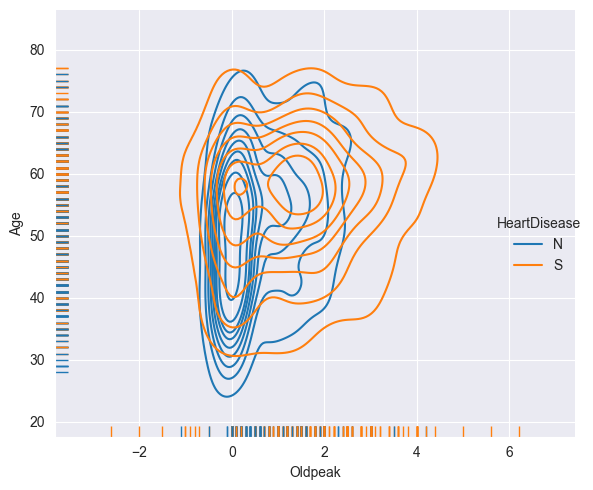

In [12]:
plt.figure(figsize=(8, 4))
sns.displot(data=df, x="Oldpeak", y="Age", kind="kde", hue='HeartDisease', rug=True)
plt.tight_layout()
plt.show()

1. Distribuição Geral:

- A maioria dos pacientes sem doença cardíaca (N) apresenta valores de "Oldpeak" concentrados próximos a 0, com uma densidade mais alta em torno dos 55 a 60 anos.
- Pacientes com doença cardíaca (S) mostram uma distribuição mais ampla de "Oldpeak", com alguns valores se estendendo acima de 4.

2. Idade e "Oldpeak":

- A densidade de pacientes com doença cardíaca é mais acentuada na faixa etária de 50 a 60 anos, mas com valores de "Oldpeak" mais elevados em comparação aos pacientes sem doença cardíaca.
- Pacientes mais jovens (abaixo de 50 anos) com doença cardíaca tendem a ter valores de "Oldpeak" mais altos em comparação aos sem a doença, embora a densidade nessa faixa etária seja menor.

3. Análise Comparativa:

- A separação entre as curvas para pacientes com e sem doença cardíaca sugere que "Oldpeak" pode ser um indicador importante para a presença de doença cardíaca, especialmente em idades mais avançadas.
- Pacientes com doença cardíaca tendem a ter uma distribuição de "Oldpeak" mais dispersa e elevada, enquanto aqueles sem a doença têm uma distribuição mais concentrada perto de valores baixos de "Oldpeak".

<Figure size 800x400 with 0 Axes>

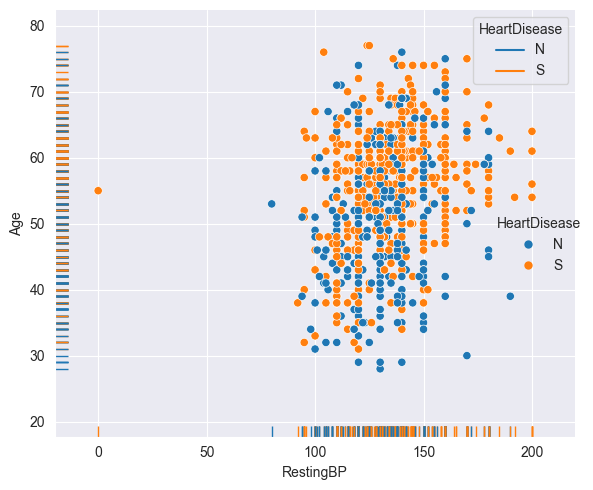

In [13]:
plt.figure(figsize=(8, 4))
sns.relplot(data=df, x="RestingBP", y="Age", hue='HeartDisease')
sns.rugplot(data=df, x="RestingBP", y="Age", hue='HeartDisease')
plt.tight_layout()
plt.show()

1. Distribuição Geral:

- A maioria dos valores de pressão arterial em repouso está concentrada entre 100 e 150 mmHg, com a maior parte dos pacientes situando-se na faixa etária de 40 a 70 anos.
- Tanto pacientes com doença cardíaca quanto aqueles sem a doença apresentam distribuições semelhantes de RestingBP, com uma leve tendência de valores mais altos para os pacientes com doença cardíaca.

2. Análise Comparativa:

- Não há uma clara separação entre os pacientes com e sem doença cardíaca com base apenas na RestingBP, indicando que este fator, isoladamente, pode não ser um preditor forte para a presença de doenças cardíacas.
- Alguns pontos fora da curva estão presentes, especialmente com pressões abaixo de 50 mmHg, o que pode indicar dados anômalos ou casos específicos que merecem uma investigação mais aprofundada.

3. Idade e Pressão Arterial:

- A distribuição de RestingBP parece ser relativamente consistente em diferentes faixas etárias, embora haja uma concentração um pouco maior de pacientes com pressão arterial mais alta na faixa etária de 50 a 60 anos, especialmente para aqueles com doença cardíaca.

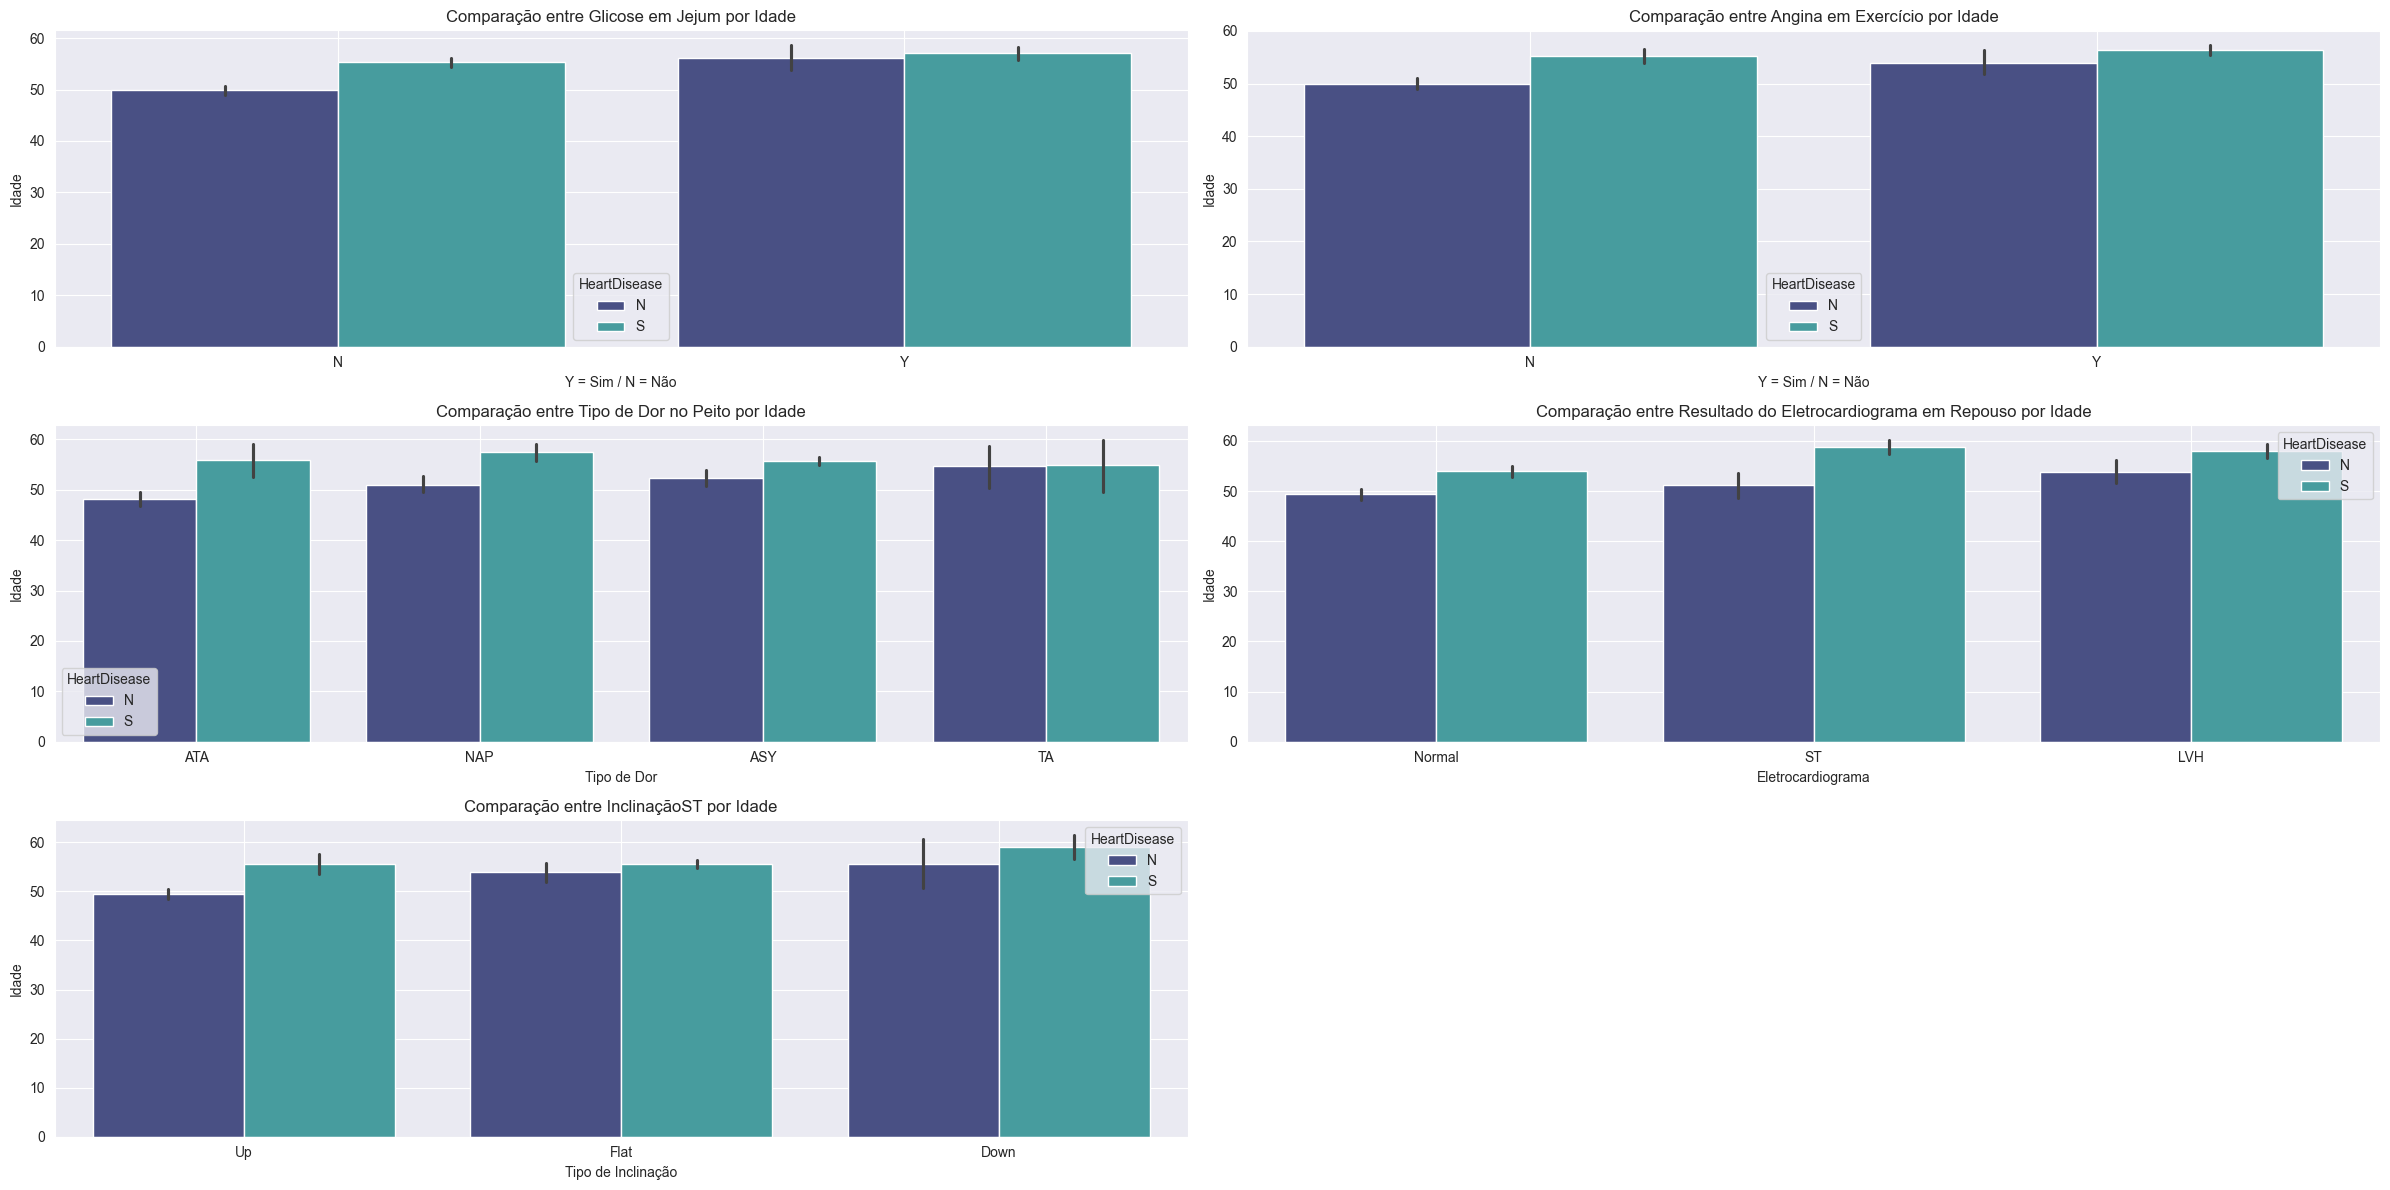

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 12))
axes = axes.flatten() 

sns.barplot(data=df, x='FastingBS', y='Age', hue='HeartDisease', ax=axes[0], palette='mako')
axes[0].set_title('Comparação entre Glicose em Jejum por Idade')
axes[0].set_xlabel('Y = Sim / N = Não')
axes[0].set_ylabel('Idade')
axes[0].grid(True)

sns.barplot(data=df, x='ExerciseAngina', y='Age', hue='HeartDisease', ax=axes[1], palette='mako')
axes[1].set_title('Comparação entre Angina em Exercício por Idade')
axes[1].set_xlabel('Y = Sim / N = Não')
axes[1].set_ylabel('Idade')
axes[1].grid(True)

sns.barplot(data=df, x='ChestPainType', y='Age', hue='HeartDisease', ax=axes[2], palette='mako')
axes[2].set_title('Comparação entre Tipo de Dor no Peito por Idade')
axes[2].set_xlabel('Tipo de Dor')
axes[2].set_ylabel('Idade')
axes[2].grid(True)

sns.barplot(data=df, x='RestingECG', y='Age', hue='HeartDisease', ax=axes[3], palette='mako')
axes[3].set_title('Comparação entre Resultado do Eletrocardiograma em Repouso por Idade')
axes[3].set_xlabel('Eletrocardiograma')
axes[3].set_ylabel('Idade')
axes[3].grid(True)

sns.barplot(data=df, x='ST_Slope', y='Age', hue='HeartDisease', ax=axes[4], palette='mako')
axes[4].set_title('Comparação entre InclinaçãoST por Idade')
axes[4].set_xlabel('Tipo de Inclinação')
axes[4].set_ylabel('Idade')
axes[4].grid(True)

fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

1. Comparação entre Glicose em Jejum por Idade:
- Observações:
    - Pacientes que não possuem glicose elevada em jejum (N) tendem a ter uma idade média menor do que aqueles que possuem glicose elevada (Y).
    - A diferença na idade média entre pacientes com e sem doença cardíaca é menos pronunciada, embora ainda exista uma tendência de pacientes com doença cardíaca apresentarem uma idade média ligeiramente maior.

2. Comparação entre Angina em Exercício por Idade:
- Observações:
    - Pacientes que apresentam angina durante o exercício (Y) tendem a ser mais velhos.
    - Entre os pacientes com angina em exercício, aqueles com doença cardíaca têm uma idade média maior em comparação aos que não possuem a doença.

3. Comparação entre Tipo de Dor no Peito por Idade:
- Observações:
    - Pacientes com dor torácica tipo "ASY" (Assintomático) têm uma idade média mais alta em comparação aos outros tipos de dor no peito.
    - A maior diferença entre pacientes com e sem doença cardíaca é observada no grupo "ASY", onde pacientes com doença cardíaca têm uma idade média significativamente maior.

4. Comparação entre Resultado do Eletrocardiograma em Repouso por Idade:
- Observações:
    - Pacientes com resultados de eletrocardiograma de "ST" (anormalidade de segmento ST) têm uma idade média maior, especialmente aqueles que possuem doença cardíaca.
    - O grupo "LVH" (Hipertrofia Ventricular Esquerda) também mostra uma diferença notável na idade média, com pacientes com doença cardíaca sendo mais velhos.

5. Comparação entre InclinaçãoST por Idade:
- Observações:
    - A inclinação "Up" (elevação do segmento ST) está associada a uma idade média menor, enquanto a inclinação "Down" (depressão do segmento ST) está associada a uma idade média maior.
    - Pacientes com doença cardíaca e inclinação "Down" são geralmente mais velhos em comparação aos que não possuem a doença.

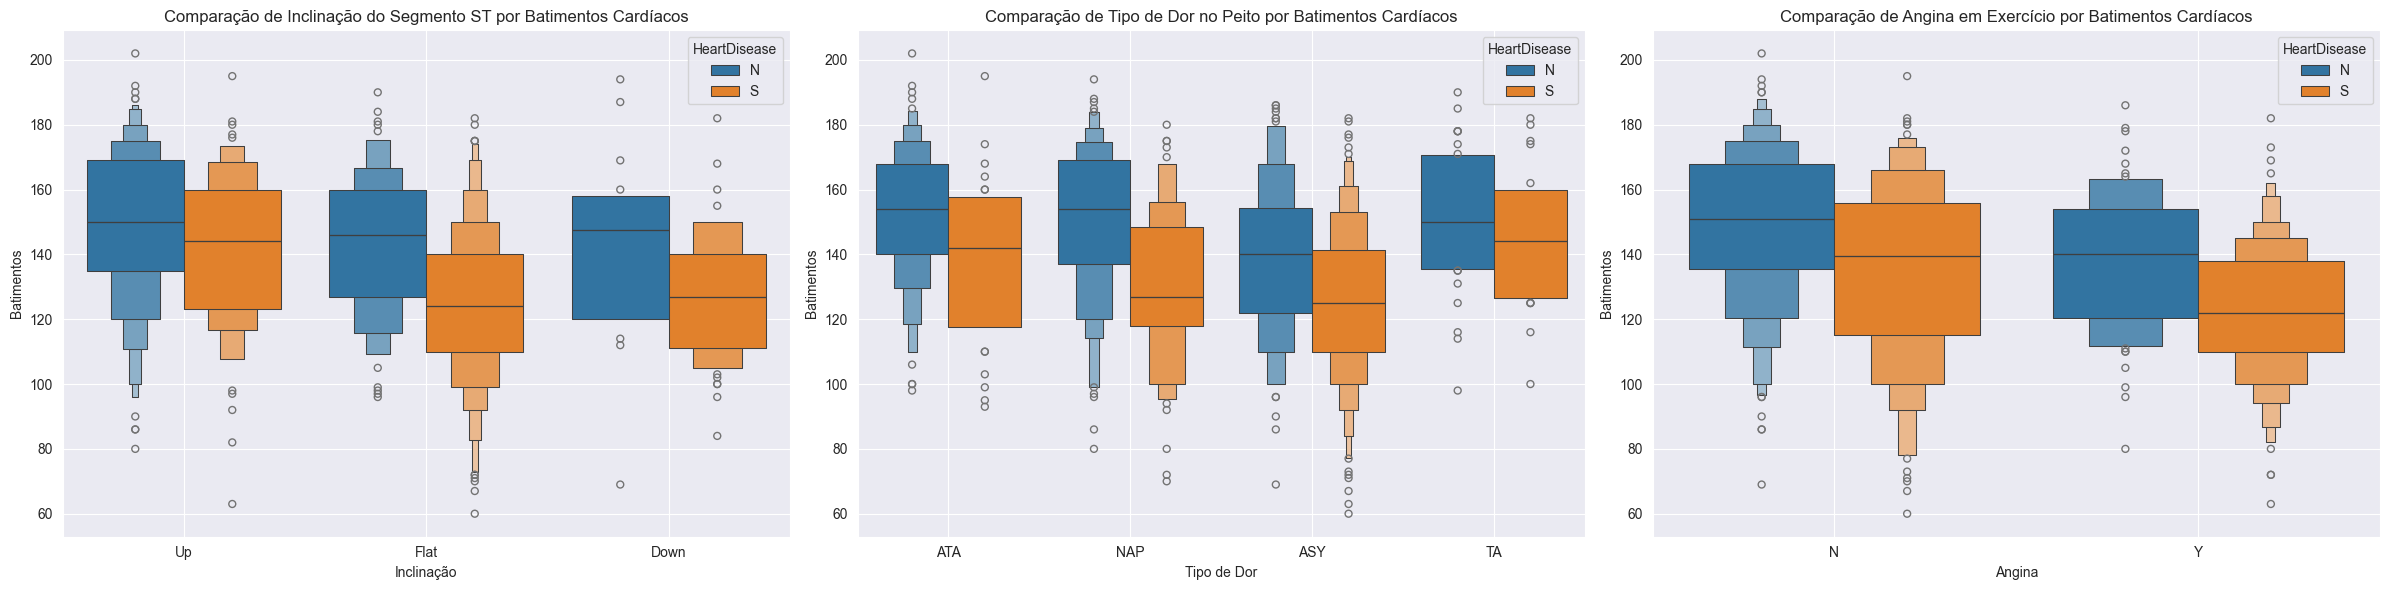

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
axes = axes.flatten() 

sns.boxenplot(data=df, x='ST_Slope', y='MaxHR', hue='HeartDisease', ax=axes[0])
axes[0].set_title('Comparação de Inclinação do Segmento ST por Batimentos Cardíacos')
axes[0].set_xlabel('Inclinação')
axes[0].set_ylabel('Batimentos')
axes[0].grid(True)

sns.boxenplot(data=df, x='ChestPainType', y='MaxHR', hue='HeartDisease', ax=axes[1])
axes[1].set_title('Comparação de Tipo de Dor no Peito por Batimentos Cardíacos')
axes[1].set_xlabel('Tipo de Dor')
axes[1].set_ylabel('Batimentos')
axes[1].grid(True)

sns.boxenplot(data=df, x='ExerciseAngina', y='MaxHR', hue='HeartDisease', ax=axes[2])
axes[2].set_title('Comparação de Angina em Exercício por Batimentos Cardíacos')
axes[2].set_xlabel('Angina')
axes[2].set_ylabel('Batimentos')
axes[2].grid(True)

plt.tight_layout()
plt.show()

1. Comparação de Inclinação do Segmento ST por Batimentos Cardíacos:
- Observações:
    - Inclinação "Up": Pacientes sem doença cardíaca (N) apresentam uma mediana de batimentos cardíacos mais alta em comparação aos pacientes com doença cardíaca (S). A distribuição é mais ampla entre os pacientes com doença cardíaca.
    - Inclinação "Flat": A mediana dos batimentos cardíacos é similar entre os dois grupos, mas a variabilidade é maior em pacientes com doença cardíaca.
    - Inclinação "Down": A mediana dos batimentos cardíacos para pacientes com doença cardíaca é notavelmente menor, indicando uma possível correlação entre a inclinação do segmento ST e a presença de doença cardíaca.

2. Comparação de Tipo de Dor no Peito por Batimentos Cardíacos:
- Observações:
    - Tipo ATA (Angina Típica): A mediana de batimentos cardíacos é mais alta em pacientes sem doença cardíaca, com uma distribuição bastante uniforme.
    - Tipo ASY (Assintomático): Pacientes com dor assintomática e doença cardíaca apresentam uma mediana mais baixa de batimentos cardíacos, com uma ampla variação nos valores.
    - Tipo TA (Angina Típica): A mediana é similar para ambos os grupos, mas pacientes sem doença cardíaca apresentam uma distribuição mais compacta.

3. Comparação de Angina em Exercício por Batimentos Cardíacos:
- Observações:
    - Sem Angina (N): Pacientes sem angina durante o exercício apresentam uma distribuição mais larga de batimentos cardíacos, com uma mediana similar entre aqueles com e sem doença cardíaca.
    - Com Angina (Y): A mediana dos batimentos cardíacos é menor em pacientes com angina que têm doença cardíaca. Existe uma maior variação entre os pacientes sem doença cardíaca.

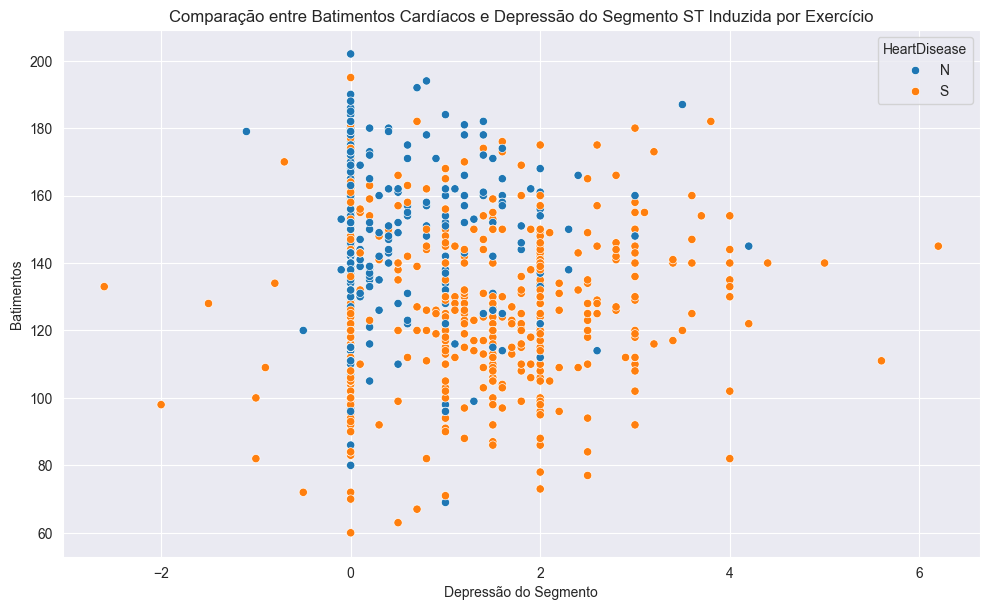

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Oldpeak', y='MaxHR', hue='HeartDisease')
plt.tight_layout()
plt.title('Comparação entre Batimentos Cardíacos e Depressão do Segmento ST Induzida por Exercício')
plt.ylabel('Batimentos')
plt.xlabel('Depressão do Segmento')
plt.show()

Distribuição Geral: A maioria dos pontos de dados está concentrada em torno de uma depressão do segmento ST próxima a zero, com uma dispersão maior nos batimentos cardíacos que variam de cerca de 60 a 200 bpm.

- Pacientes sem Doença Cardíaca (N - azul):
    - Esses pacientes apresentam uma ampla variação nos batimentos cardíacos, independentemente da depressão do segmento ST, com muitos valores de batimentos cardíacos acima de 140 bpm.
    - A depressão do segmento ST para este grupo se concentra em torno de zero, sugerindo que a maioria dos pacientes sem doença cardíaca não apresenta uma depressão significativa do segmento ST durante o exercício.

- Pacientes com Doença Cardíaca (S - laranja):
    - Para pacientes com doença cardíaca, existe uma distribuição mais uniforme dos batimentos cardíacos em relação à depressão do segmento ST, com uma maior presença de depressão do segmento ST elevada (> 2).
    - É notável que, à medida que a depressão do segmento ST aumenta, há uma concentração mais forte de pacientes com doença cardíaca em batimentos cardíacos mais baixos, principalmente abaixo de 140 bpm.

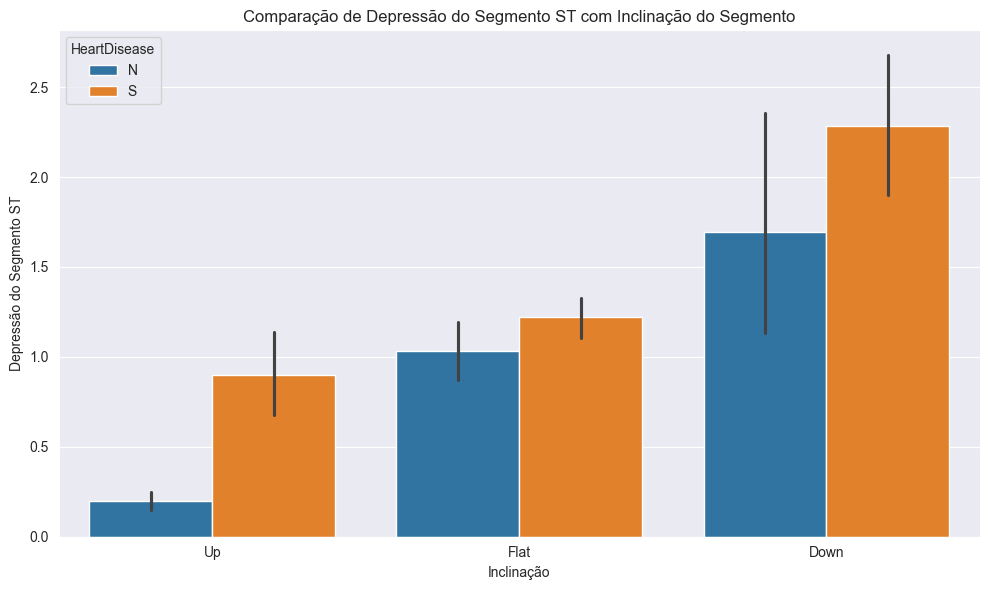

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ST_Slope', y='Oldpeak', hue='HeartDisease')
plt.title('Comparação de Depressão do Segmento ST com Inclinação do Segmento')
plt.xlabel('Inclinação')
plt.ylabel('Depressão do Segmento ST')
plt.tight_layout()
plt.show()

Observações:

- Inclinação "Up" (Ascendente):
    - Pacientes sem doença cardíaca (N - azul) tendem a ter uma depressão do segmento ST muito baixa, próxima de zero.
    - Já pacientes com doença cardíaca (S - laranja) apresentam uma depressão maior, mas ainda assim moderada, em torno de 1 unidade.

- Inclinação "Flat" (Plano):
    - A depressão do segmento ST é maior do que na inclinação ascendente para ambos os grupos, sugerindo um aumento na carga cardíaca.
    - A diferença entre pacientes com e sem doença cardíaca é menor nesta categoria, indicando que o plano tende a induzir uma resposta mais uniforme.

- Inclinação "Down" (Descendente):
    - Aqui, a depressão do segmento ST atinge seus valores mais altos, especialmente em pacientes com doença cardíaca, onde a média ultrapassa 2 unidades.
    - A inclinação descendente parece ser a mais desafiadora para o coração, com uma clara diferença entre pacientes com e sem doenças cardíacas.

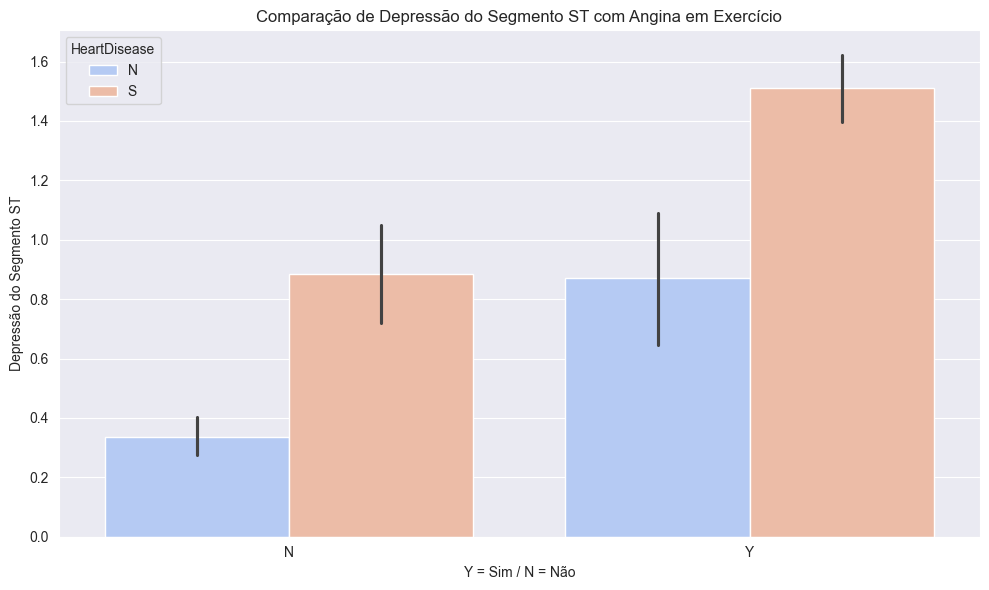

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ExerciseAngina', y='Oldpeak', hue='HeartDisease', palette='coolwarm')
plt.title('Comparação de Depressão do Segmento ST com Angina em Exercício')
plt.xlabel('Y = Sim / N = Não')
plt.ylabel('Depressão do Segmento ST')
plt.tight_layout()
plt.show()

Observações:

- Pacientes sem Angina (N - Não):

    - Pacientes sem doenças cardíacas (N - azul claro) apresentam uma depressão do segmento ST muito baixa, próxima de 0.2 unidades.
    - Pacientes com doenças cardíacas (S - laranja claro) apresentam uma depressão significativamente maior, cerca de 0.9 unidades.

- Pacientes com Angina (Y - Sim):

    - Tanto pacientes sem doenças cardíacas quanto aqueles com doenças cardíacas apresentam depressão do segmento ST mais elevada em comparação com o grupo sem angina.
    - Pacientes com doenças cardíacas apresentam uma depressão ainda maior, ultrapassando 1.6 unidades.